# Exploratory Data Analysis of Brazil Car Accidents

In [62]:
!pip install pandas
!pip install matplotlib
!pip install numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Print our head dataframe

In [63]:
df = pd.read_csv('accidents_2017_to_2023_english.csv')
df.head()

,inverse_data,week_day,hour,state,road_id,km,city,cause_of_accident,type_of_accident,victims_condition,...,slightly_injured,severely_injured,uninjured,ignored,total_injured,vehicles_involved,latitude,longitude,regional,police_station
0,2017-01-01,sunday,01:45:00,RS,116.0,"34,9",VACARIA,Mechanical loss/defect of vehicle,Rear-end collision,With injured victims,...,4,0,2,0,4,2,-28.50712,-50.94118,SPRF-RS,DEL05-RS
1,2017-01-01,sunday,01:00:00,PR,376.0,636,TIJUCAS DO SUL,Incompatible velocity,Run-off-road,With dead victims,...,0,0,1,0,0,2,-25.75400,-49.12660,SPRF-PR,DEL01-PR
2,2017-01-01,sunday,04:40:00,BA,101.0,65,ENTRE RIOS,Driver was sleeping,Head-on collision,With dead victims,...,1,1,2,0,2,2,-11.96180,-38.09530,SPRF-BA,DEL01-BA
3,2017-01-01,sunday,06:30:00,PA,316.0,"72,5",CASTANHAL,Driver's lack of attention to conveyance,Side impact collision,With dead victims,...,0,0,3,0,0,3,-1.28998,-47.83483,SPRF-PA,DEL01-PA
4,2017-01-01,sunday,09:00:00,GO,20.0,"220,5",POSSE,Road's defect,Collision with fixed object,With injured victims,...,2,1,0,0,3,1,-14.14221,-46.32259,SPRF-DF,DEL02-DF


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inverse_data        463152 non-null  object 
 1   week_day            463152 non-null  object 
 2   hour                463152 non-null  object 
 3   state               463152 non-null  object 
 4   road_id             462162 non-null  float64
 5   km                  462162 non-null  object 
 6   city                463152 non-null  object 
 7   cause_of_accident   463152 non-null  object 
 8   type_of_accident    463152 non-null  object 
 9   victims_condition   463152 non-null  object 
 10  weather_timestamp   463152 non-null  object 
 11  road_direction      463152 non-null  object 
 12  wheather_condition  463152 non-null  object 
 13  road_type           463152 non-null  object 
 14  road_delineation    463152 non-null  object 
 15  people              463152 non-nul

List our spatial data

In [126]:
#spatial data
state = df['state']
city = df['city']
print(state.value_counts())

MG    61321
SC    55418
PR    52933
RS    32408
RJ    32233
SP    30745
BA    24338
GO    22748
PE    18675
ES    17308
MT    16272
MS    10862
CE    10726
PB    10325
RO    10243
RN     9145
PI     8522
MA     8049
PA     6798
DF     6642
AL     4427
TO     3974
SE     3871
AC     1728
RR     1601
AP     1066
AM      774
Name: state, dtype: int64


In [127]:
print(city.value_counts())
#We have too many cities

BRASILIA              6642
CURITIBA              6479
SAO JOSE              5107
GUARULHOS             4941
PALHOCA               4165
                      ... 
PARICONHA                1
DARIO MEIRA              1
BOQUEIRAO DO PIAUI       1
CABECEIRA GRANDE         1
FARROUPILHA              1
Name: city, Length: 2083, dtype: int64


# Basic Visualizations of EDA

Accidents per State:

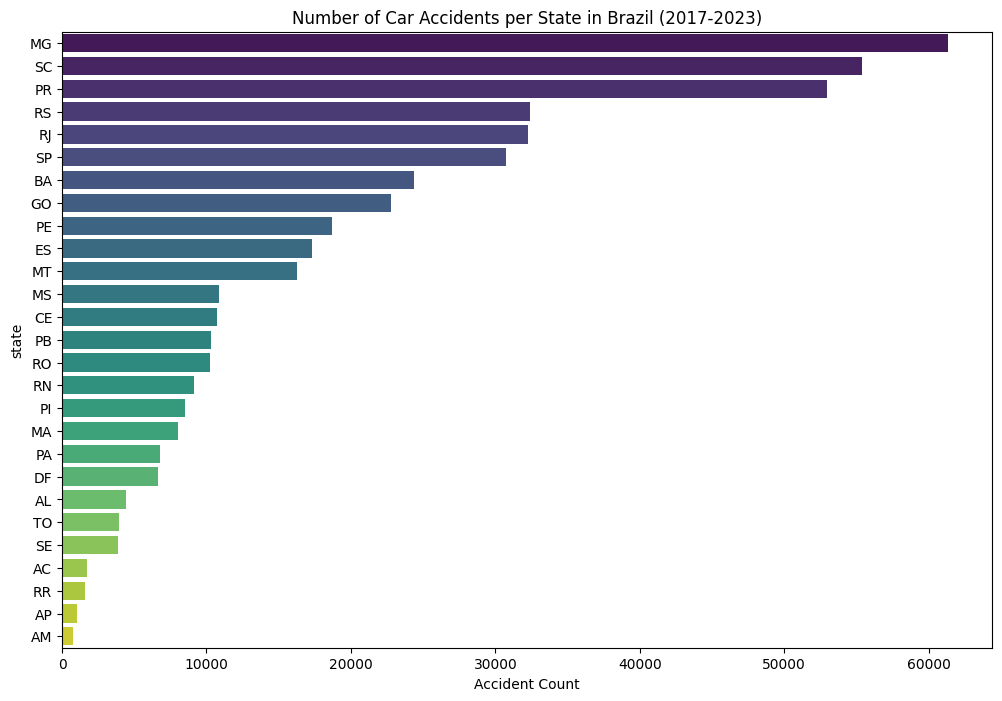

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

state_accidents = state.value_counts().reset_index()
state_accidents.columns = ['state', 'Accident Count']

plt.figure(figsize=(12, 8))
sns.barplot(x='Accident Count', y='state', data=state_accidents, palette='viridis')
plt.title('Number of Car Accidents per State in Brazil (2017-2023)')
plt.xlabel('Accident Count')
plt.ylabel('state')
plt.show()

Accidents per City: Too many cities = choppy visualization

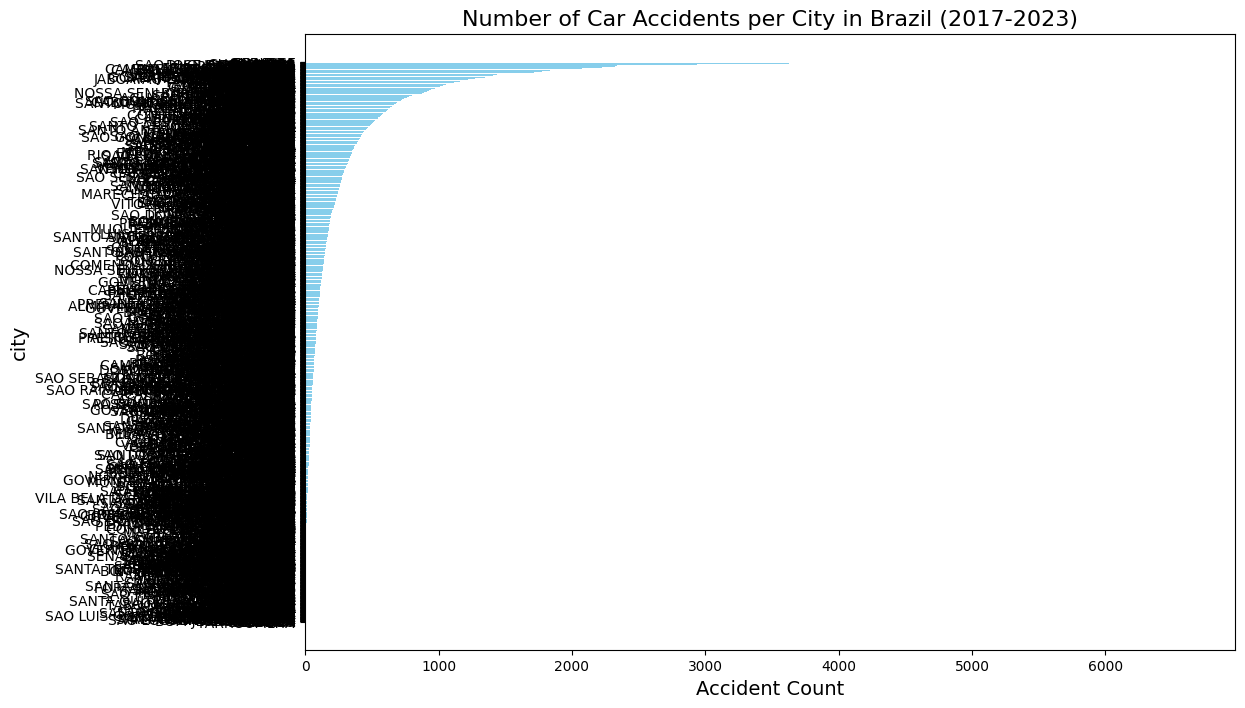

In [129]:
# Aggregate accident counts based on city
city_accidents = city.value_counts().reset_index()  
city_accidents.columns = ['city', 'Accident Count']

# Sort out the data by accident count in descending order
city_accidents = city_accidents.sort_values(by='Accident Count', ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(city_accidents['city'], city_accidents['Accident Count'], color='skyblue')
plt.title('Number of Car Accidents per City in Brazil (2017-2023)', fontsize=16)
plt.xlabel('Accident Count', fontsize=14)
plt.ylabel('city', fontsize=14)
plt.gca().invert_yaxis() 
plt.show()

Fatal Car Accidents to State:

Value counts of fatal accidents by state:
   state  Fatal Accident Count
0     MG                  3963
1     PR                  3145
2     BA                  2788
3     SC                  2178
4     PE                  1860
5     RJ                  1796
6     RS                  1790
7     GO                  1598
8     SP                  1385
9     MT                  1258
10    MA                  1246
11    CE                  1013
12    PI                   900
13    PA                   896
14    ES                   870
15    MS                   797
16    PB                   751
17    RN                   636
18    RO                   520
19    AL                   487
20    TO                   468
21    SE                   279
22    DF                   275
23    RR                   173
24    AC                   113
25    AM                    87
26    AP                    72


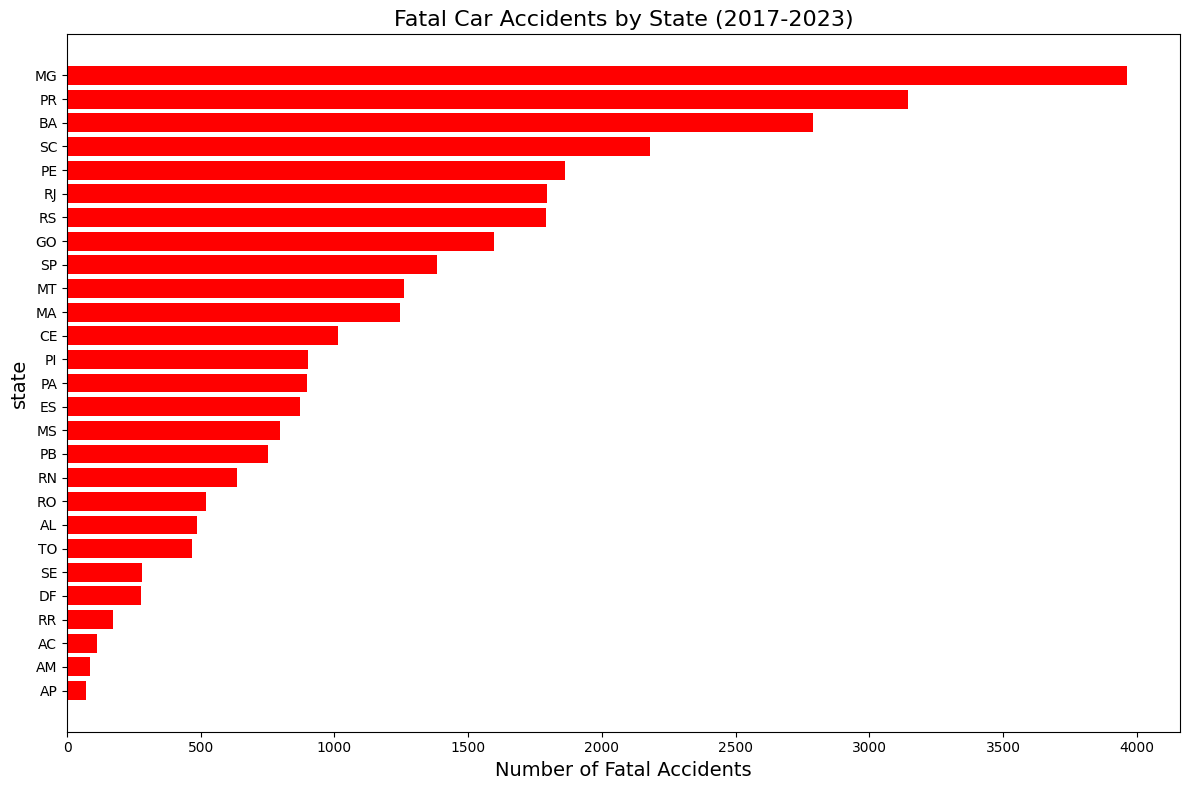

In [130]:
# Filter out the dataset for fatal accidents
fatal_accidents = df[df['victims_condition'] == 'With dead victims']  

# Count num. of fatal accidents by per state
state_fatal_counts = fatal_accidents['state'].value_counts().reset_index()  
state_fatal_counts.columns = ['state', 'Fatal Accident Count']

# Display the value counts as a df
print("Value counts of fatal accidents by state:")
print(state_fatal_counts)

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(state_fatal_counts['state'], state_fatal_counts['Fatal Accident Count'], color='red')
plt.title('Fatal Car Accidents by State (2017-2023)', fontsize=16)
plt.xlabel('Number of Fatal Accidents', fontsize=14)
plt.ylabel('state', fontsize=14)

# To display the highest count at the top
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

Non-fatal Accidents Per State:

Value counts of non-fatal accidents by state:
   state  Non-Fatal Accident Count
0     MG                     45677
1     SC                     42025
2     PR                     37207
3     RJ                     23723
4     SP                     22298
5     RS                     22249
6     BA                     16645
7     GO                     16022
8     ES                     14230
9     PE                     12449
10    MT                     10504
11    MS                      7832
12    RO                      7556
13    CE                      7458
14    PB                      7316
15    RN                      6941
16    PI                      5839
17    DF                      4988
18    MA                      4918
19    PA                      4525
20    AL                      2856
21    SE                      2685
22    TO                      2614
23    AC                      1343
24    RR                      1091
25    AP                       775
26    AM 

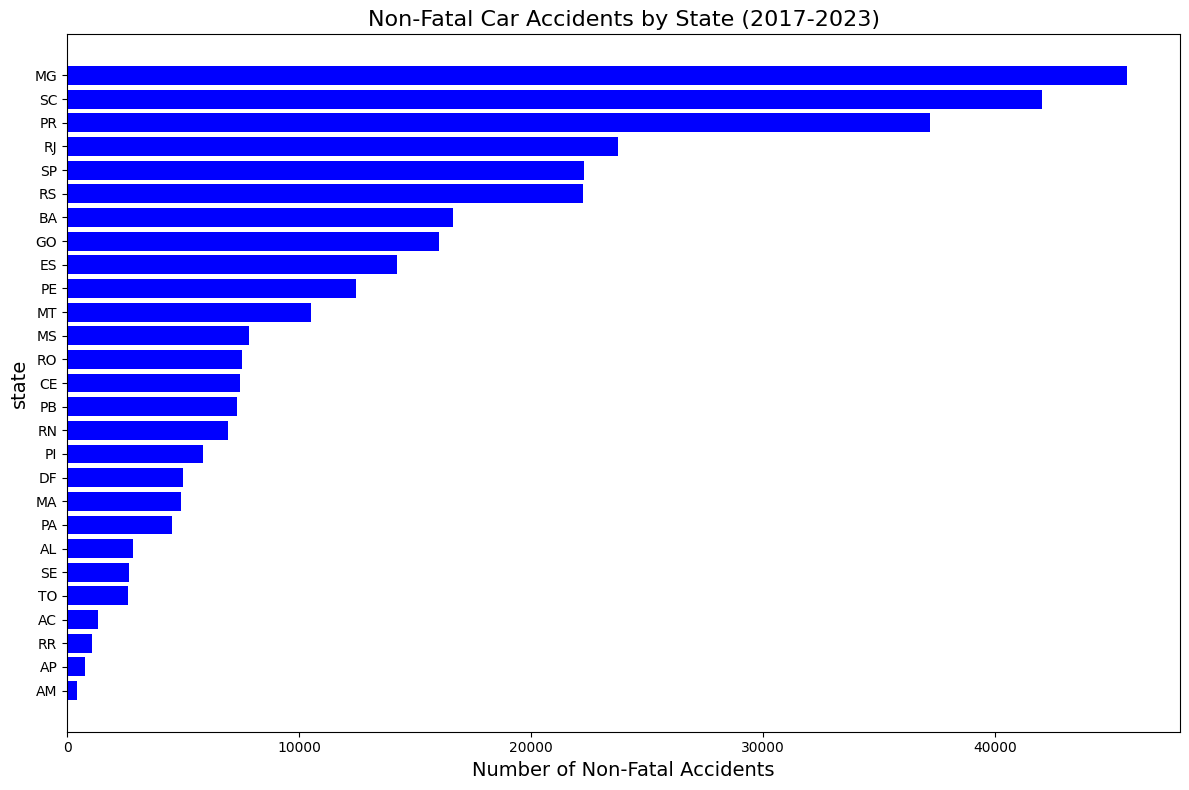

In [131]:
# Filter out our dataset based on non-fatal accidents:
non_fatal_accidents = df[df['victims_condition'] == 'With injured victims']  

# Count non-fatal accidents per state:
state_non_fatal_counts = non_fatal_accidents['state'].value_counts().reset_index()
state_non_fatal_counts.columns = ['state', 'Non-Fatal Accident Count']

# Display the value counts as a df:
print("Value counts of non-fatal accidents by state:")
print(state_non_fatal_counts)

# Plot out the data
plt.figure(figsize=(12, 8))
plt.barh(state_non_fatal_counts['state'], state_non_fatal_counts['Non-Fatal Accident Count'], color='blue')
plt.title('Non-Fatal Car Accidents by State (2017-2023)', fontsize=16)
plt.xlabel('Number of Non-Fatal Accidents', fontsize=14)
plt.ylabel('state', fontsize=14)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

Combine our fatal vs non-fatal data sets into one visualization

Merged Dataset:
   state  Fatal Accident Count  Non-Fatal Accident Count
0     MG                  3963                     45677
1     PR                  3145                     37207
2     BA                  2788                     16645
3     SC                  2178                     42025
4     PE                  1860                     12449
5     RJ                  1796                     23723
6     RS                  1790                     22249
7     GO                  1598                     16022
8     SP                  1385                     22298
9     MT                  1258                     10504
10    MA                  1246                      4918
11    CE                  1013                      7458
12    PI                   900                      5839
13    PA                   896                      4525
14    ES                   870                     14230
15    MS                   797                      7832
16    PB       

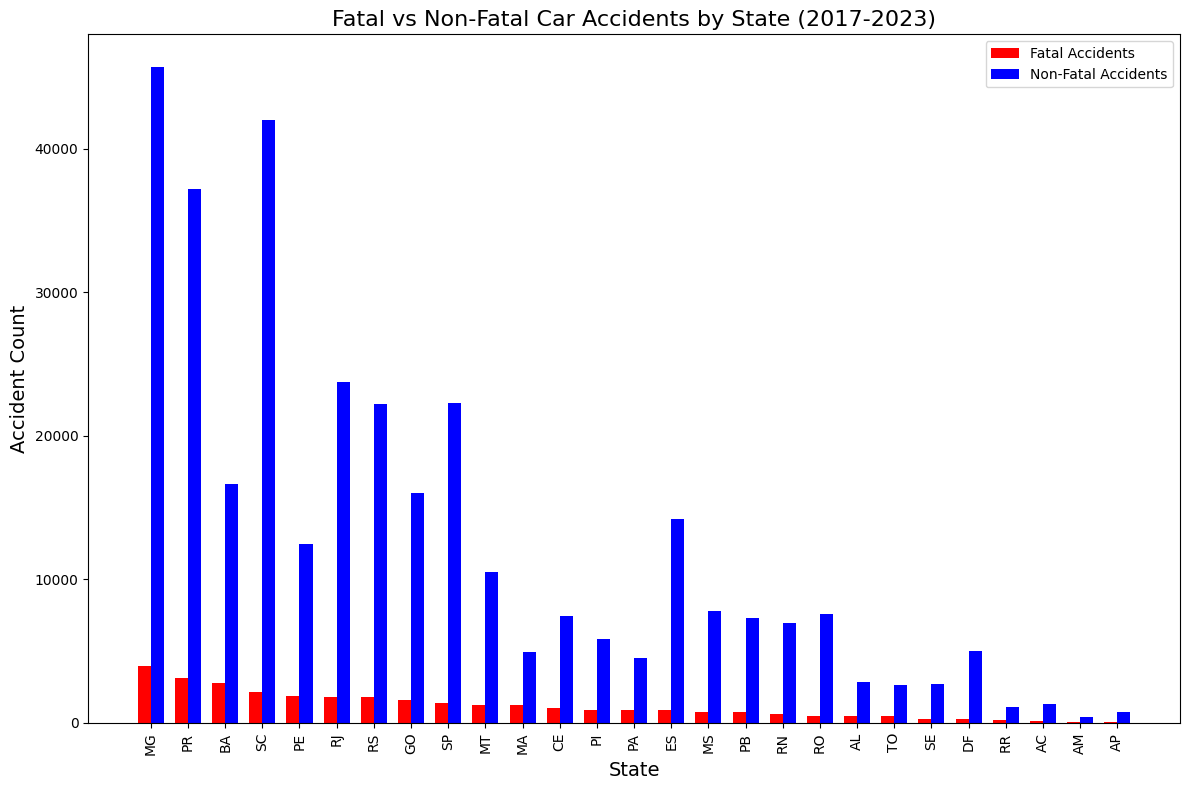

In [132]:
merged_data = pd.merge(state_fatal_counts, state_non_fatal_counts, on='state', how='outer')

# Fill any NaN values with 0 (in case some states have only fatal or non-fatal accidents)
merged_data.fillna(0, inplace=True)

# Convert counts to integers and make the merged togethere
merged_data['Fatal Accident Count'] = merged_data['Fatal Accident Count'].astype(int)
merged_data['Non-Fatal Accident Count'] = merged_data['Non-Fatal Accident Count'].astype(int)

# Display the merged dataset
print("Merged Dataset:")
print(merged_data)

# Save the merged data to a CSV file
merged_data.to_csv('merged_accident_data.csv', index=False)

# Plot combined bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(merged_data))

plt.bar(index, merged_data['Fatal Accident Count'], bar_width, label='Fatal Accidents', color='red')
plt.bar([i + bar_width for i in index], merged_data['Non-Fatal Accident Count'], bar_width, label='Non-Fatal Accidents', color='blue')

plt.xlabel('State', fontsize=14)
plt.ylabel('Accident Count', fontsize=14)
plt.title('Fatal vs Non-Fatal Car Accidents by State (2017-2023)', fontsize=16)
plt.xticks([i + bar_width / 2 for i in index], merged_data['state'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Play around with folium to get real map visualization

# Data Integration

Manually integrate state population and state density using dictionaries:

In [136]:
# Dictionaries for state populations and densities
state_populations = {
    'SP': 44035304, 'MG': 20734097, 'RJ': 16461173, 'BA': 15126371,
    'RS': 11207274, 'PR': 11081692, 'PE': 9277727, 'CE': 8842791,
    'PA': 8073924, 'MA': 6850884, 'SC': 6727148, 'GO': 6523222,
    'PB': 3943885, 'ES': 3885049, 'AM': 3873743, 'RN': 3408510,
    'AL': 3321730, 'MT': 3224357, 'PI': 3194178, 'DF': 2852372,
    'MS': 2619657, 'SE': 2219514, 'RO': 1748531, 'TO': 1496880,
    'AC': 790101, 'AP': 750912, 'RR': 496936
}

#state density per km2
state_density = {
    'SP': 166.23, 'MG': 33.41, 'RJ': 365.23, 'BA': 24.82,
    'RS': 37.96, 'PR': 52.40, 'PE': 89.62, 'CE': 56.80,
    'PA': 6.07, 'MA': 19.81, 'SC': 65.27, 'GO': 17.65,
    'PB': 66.70, 'ES': 76.25, 'AM': 2.23, 'RN': 59.99,
    'AL': 112.30, 'MT': 3.36, 'PI': 12.40, 'DF': 444.66,
    'MS': 6.86, 'SE': 94.36, 'RO': 6.58, 'TO': 4.98,
    'AC': 4.47, 'AP': 4.69, 'RR': 2.01
}

# Add population and density columns
df['State Population'] = df['state'].map(state_populations)
df['State Density'] = df['state'].map(state_density)

# Display the updated DataFrame
df.head()

,inverse_data,week_day,hour,state,road_id,km,city,cause_of_accident,type_of_accident,victims_condition,...,ignored,total_injured,vehicles_involved,latitude,longitude,regional,police_station,State Population,State Density,Density Range
0,2017-01-01,sunday,01:45:00,RS,116.0,"34,9",VACARIA,Mechanical loss/defect of vehicle,Rear-end collision,With injured victims,...,0,4,2,-28.50712,-50.94118,SPRF-RS,DEL05-RS,11207274,37.96,0-50
1,2017-01-01,sunday,01:00:00,PR,376.0,636,TIJUCAS DO SUL,Incompatible velocity,Run-off-road,With dead victims,...,0,0,2,-25.75400,-49.12660,SPRF-PR,DEL01-PR,11081692,52.40,50-100
2,2017-01-01,sunday,04:40:00,BA,101.0,65,ENTRE RIOS,Driver was sleeping,Head-on collision,With dead victims,...,0,2,2,-11.96180,-38.09530,SPRF-BA,DEL01-BA,15126371,24.82,0-50
3,2017-01-01,sunday,06:30:00,PA,316.0,"72,5",CASTANHAL,Driver's lack of attention to conveyance,Side impact collision,With dead victims,...,0,0,3,-1.28998,-47.83483,SPRF-PA,DEL01-PA,8073924,6.07,0-50
4,2017-01-01,sunday,09:00:00,GO,20.0,"220,5",POSSE,Road's defect,Collision with fixed object,With injured victims,...,0,3,1,-14.14221,-46.32259,SPRF-DF,DEL02-DF,6523222,17.65,0-50


Check for missing values in our newly integrated dataset:

In [137]:
# Check for missing values in specific columns
missing_values = df[['state', 'State Population', 'State Density']].isnull().sum()

# Print the result
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
state               0
State Population    0
State Density       0
dtype: int64


In [138]:
df.isnull().sum()

inverse_data             0
week_day                 0
hour                     0
state                    0
road_id                990
km                     990
city                     0
cause_of_accident        0
type_of_accident         0
victims_condition        0
weather_timestamp        0
road_direction           0
wheather_condition       0
road_type                0
road_delineation         0
people                   0
deaths                   0
slightly_injured         0
severely_injured         0
uninjured                0
ignored                  0
total_injured            0
vehicles_involved        0
latitude                 0
longitude                0
regional                10
police_station        1310
State Population         0
State Density            0
Density Range            0
dtype: int64

In [139]:
print(df)

       inverse_data   week_day      hour state  road_id     km  \
0        2017-01-01     sunday  01:45:00    RS    116.0   34,9   
1        2017-01-01     sunday  01:00:00    PR    376.0    636   
2        2017-01-01     sunday  04:40:00    BA    101.0     65   
3        2017-01-01     sunday  06:30:00    PA    316.0   72,5   
4        2017-01-01     sunday  09:00:00    GO     20.0  220,5   
...             ...        ...       ...   ...      ...    ...   
463147   2023-02-09   thursday  05:10:00    PR    116.0   89,5   
463148   2023-06-28  wednesday  19:48:00    ES    101.0    271   
463149   2023-07-27   thursday  05:20:00    PI    343.0    478   
463150   2023-05-13   saturday  09:10:00    RJ    116.0    173   
463151   2023-08-20     sunday  07:50:00    RS    392.0   96,8   

                      city                                  cause_of_accident  \
0                  VACARIA                  Mechanical loss/defect of vehicle   
1           TIJUCAS DO SUL                   

Population vs Total Accidents

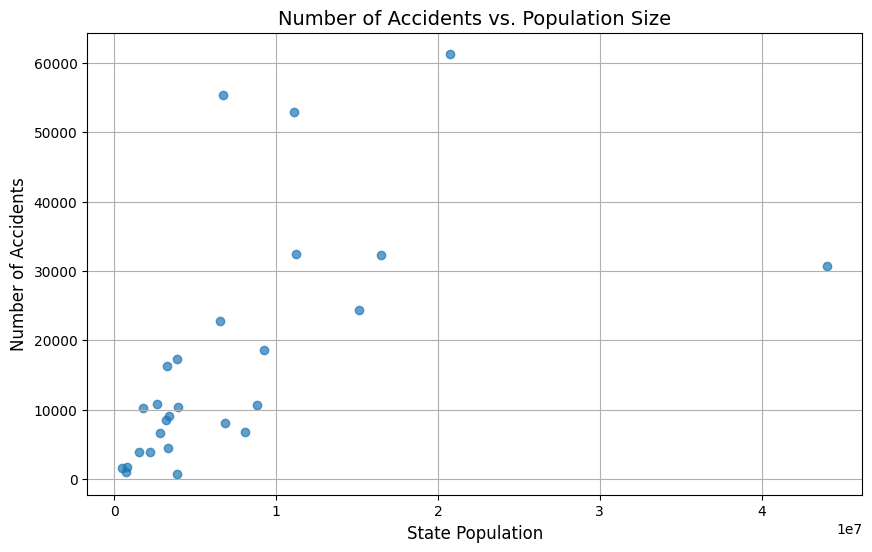

In [78]:
state_summary = df.groupby('state').agg({
    'State Population': 'first',  # Population is the same for each state
    'uninjured': 'sum',          # Total uninjured victims per state
    'inverse_data': 'count'      # Total accidents per state
}).rename(columns={'inverse_data': 'accident_count'})

# Calculate accidents per 100,000 residents
state_summary['accidents_per_capita'] = (state_summary['accident_count'] / state_summary['State Population']) * 100000

# Scatter plot: Accidents vs. Population
plt.figure(figsize=(10, 6))
plt.scatter(state_summary['State Population'], state_summary['accident_count'], alpha=0.7)
plt.title('Number of Accidents vs. Population Size', fontsize=14)
plt.xlabel('State Population', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(True)
plt.show()

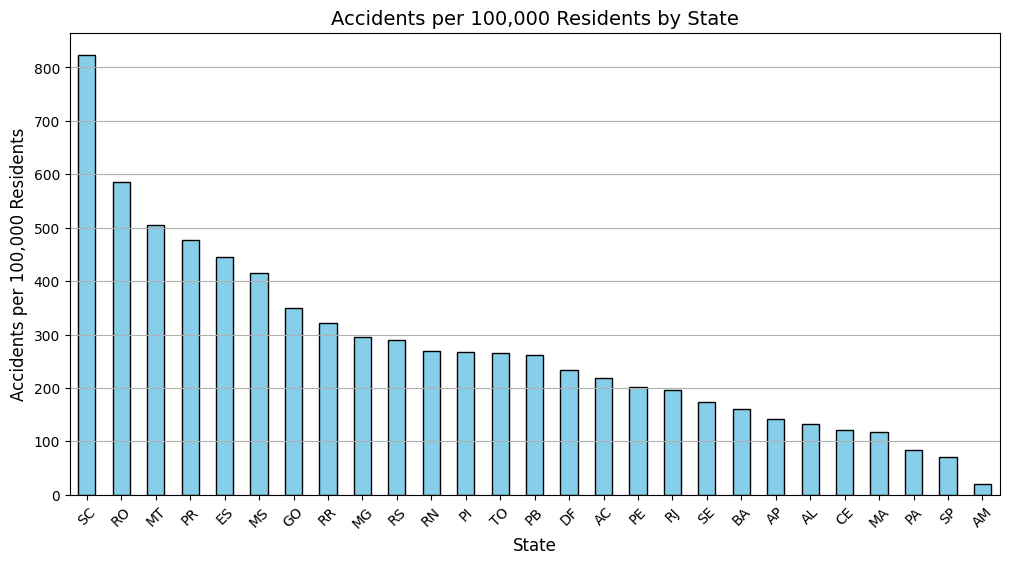

In [140]:
# Bar chart: Accidents per Capita
plt.figure(figsize=(12, 6))
state_summary['accidents_per_capita'].sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Accidents per 100,000 Residents by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Accidents per 100,000 Residents', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y')
plt.show()

Uninjured victime vs Total population size per state

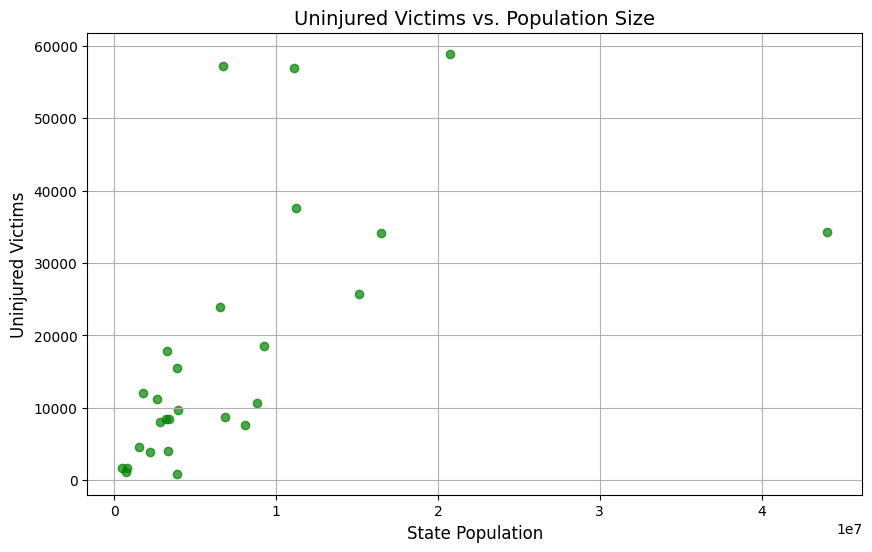

In [141]:
# Scatter plot: Uninjured Victims vs. Population
plt.figure(figsize=(10, 6))
plt.scatter(state_summary['State Population'], state_summary['uninjured'], alpha=0.7, color='green')
plt.title('Uninjured Victims vs. Population Size', fontsize=14)
plt.xlabel('State Population', fontsize=12)
plt.ylabel('Uninjured Victims', fontsize=12)
plt.grid(True)
plt.show()

Total accidents vs State Density 

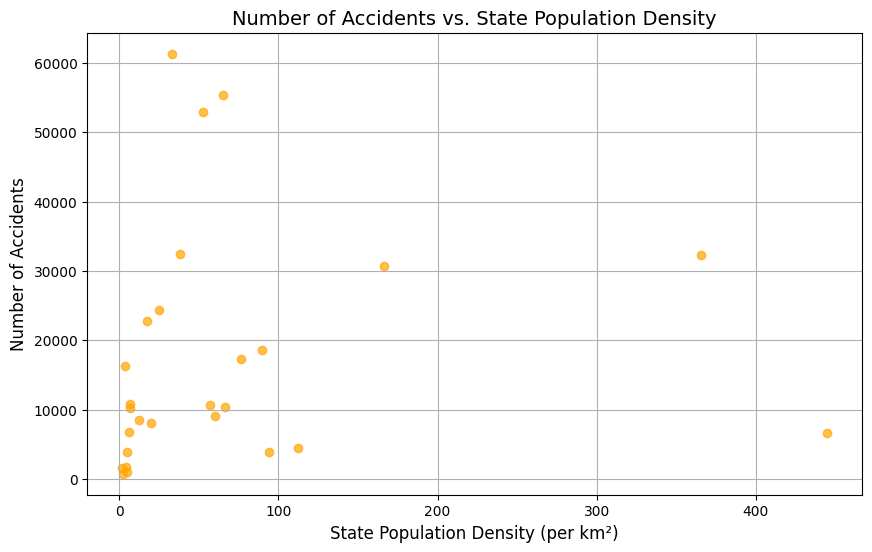

In [142]:
# Group by state
state_density_summary = df.groupby('state').agg({
    'State Density': 'first',  # Density is the same for each state
    'inverse_data': 'count'    # Total accidents per state
}).rename(columns={'inverse_data': 'accident_count'}) #calculate accident count and density

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(state_density_summary['State Density'], state_density_summary['accident_count'], alpha=0.7, color='orange')
plt.title('Number of Accidents vs. State Population Density', fontsize=14)
plt.xlabel('State Population Density (per km²)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(True)
plt.show()

Heatmap of total accident count vs Density Range

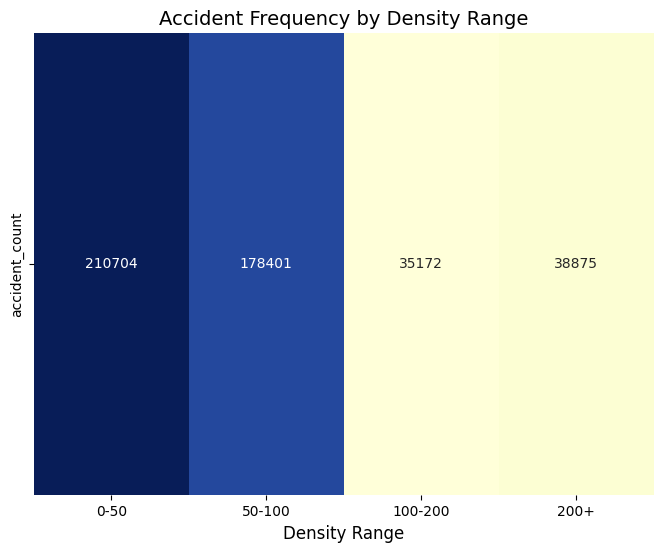

In [144]:
import seaborn as sns

# Create 'Density Range' based on state density
bins = [0, 50, 100, 200, 500]  # Use bins to define state density
labels = ['0-50', '50-100', '100-200', '200+']  # Labels for bins

# density range column
df['Density Range'] = pd.cut(df['State Density'], bins=bins, labels=labels, include_lowest=True)

# Group our'Density Range' and count accidents
heatmap_data = df.groupby('Density Range').size().reset_index(name='accident_count')

# Create heat map
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.set_index('Density Range').T, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.title('Accident Frequency by Density Range', fontsize=14)
plt.ylabel('')
plt.xlabel('Density Range', fontsize=12)
plt.show()

Boxplot for accident severity vs state density

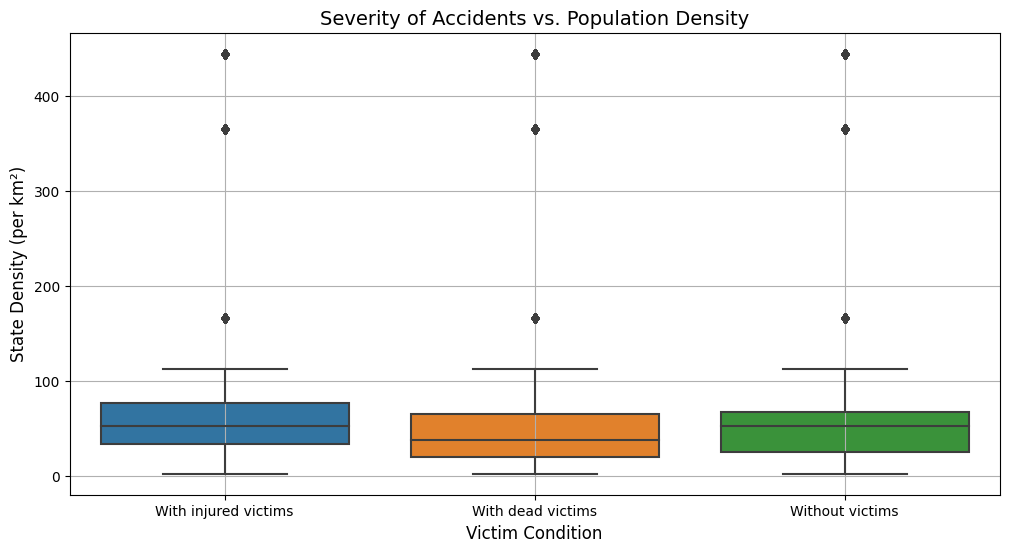

In [87]:
# Boxplot: Severity of Accidents vs. Density
plt.figure(figsize=(12, 6))
sns.boxplot(x='victims_condition', y='State Density', data=df)
plt.title('Severity of Accidents vs. Population Density', fontsize=14)
plt.xlabel('Victim Condition', fontsize=12)
plt.ylabel('State Density (per km²)', fontsize=12)
plt.grid(True)
plt.show()

Linear Regression Model: Population vs Accident Count

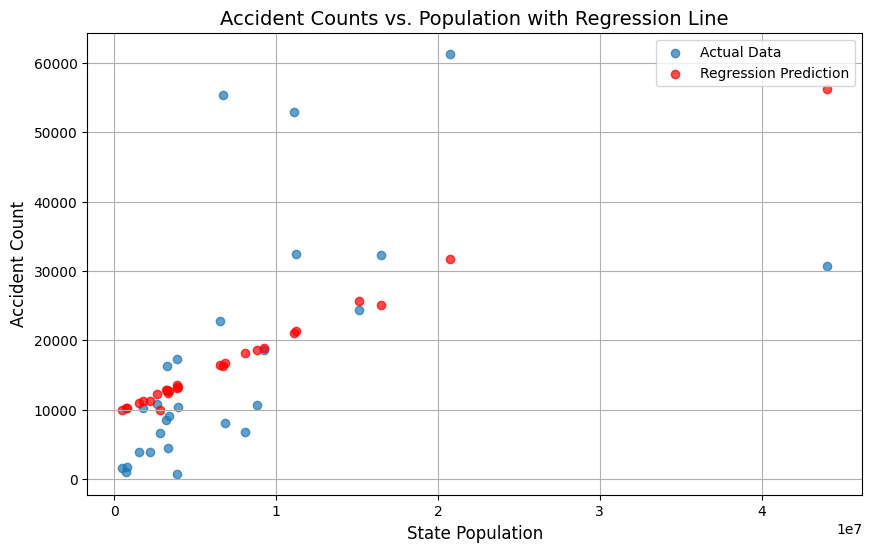

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for regression analysis
regression_data = df.groupby('state').agg({
    'State Population': 'first',
    'State Density': 'first',
    'inverse_data': 'count'  # Total accident counts
}).rename(columns={'inverse_data': 'accident_count'})

# Regression analysis: Predict accident counts based on population and density
X = regression_data[['State Population', 'State Density']].values
y = regression_data['accident_count'].values

# Fit regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Create our predictions
y_pred = reg_model.predict(X)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(regression_data['State Population'], regression_data['accident_count'], label='Actual Data', alpha=0.7)
plt.scatter(regression_data['State Population'], y_pred, label='Regression Prediction', color='red', alpha=0.7)
plt.title('Accident Counts vs. Population with Regression Line', fontsize=14)
plt.xlabel('State Population', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Number of cities in state vs Total accident count

In [146]:
#Number of cities in each state
unique_cities_per_state = df.groupby('state')['city'].nunique()
print(unique_cities_per_state)

state
AC     16
AL     52
AM     14
AP     12
BA    201
CE     73
DF      1
ES     44
GO     94
MA     96
MG    247
MS     60
MT     75
PA     67
PB     76
PE     93
PI     91
PR    164
RJ     58
RN     78
RO     26
RR     12
RS    212
SC    127
SE     23
SP     73
TO     46
Name: city, dtype: int64


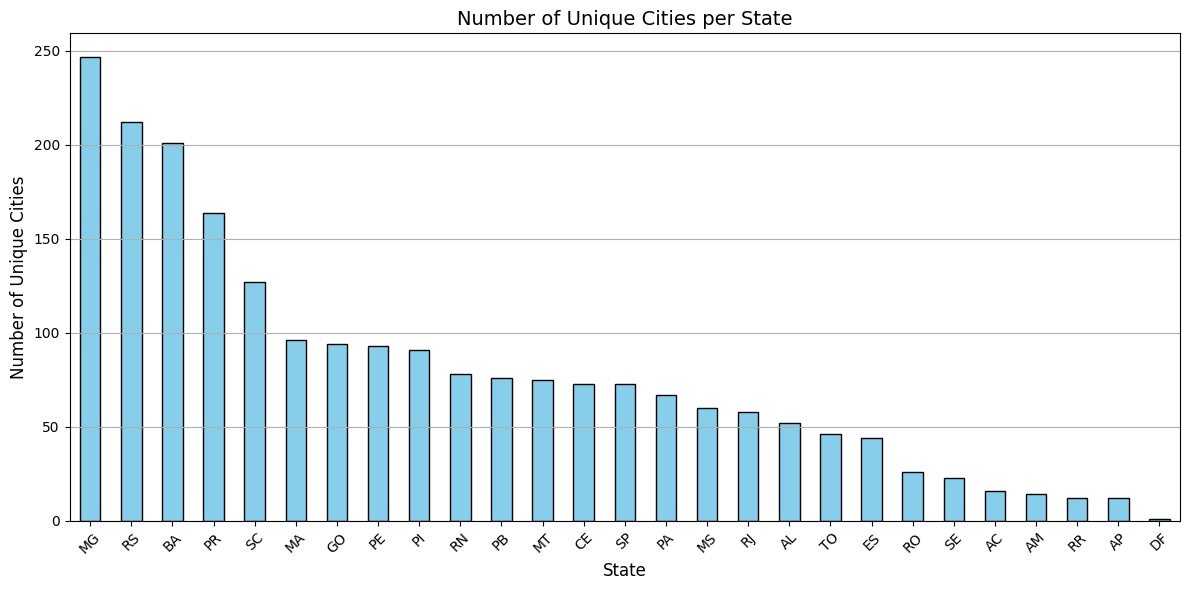

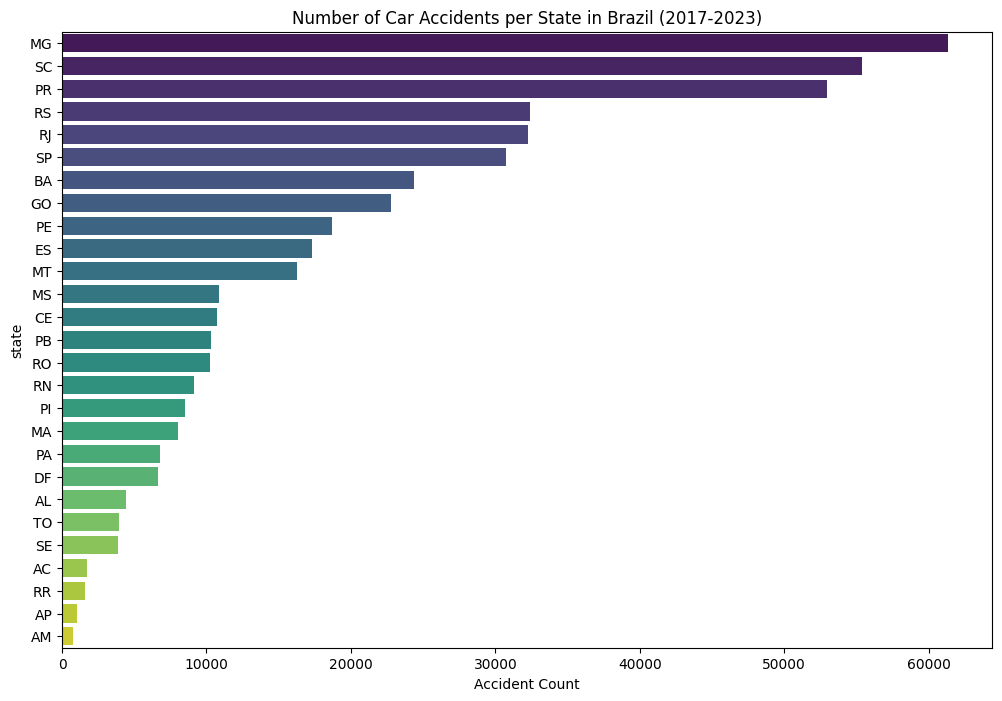

In [147]:
# Sort values for better visualization
unique_cities_per_state_sorted = unique_cities_per_state.sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(12, 6))
unique_cities_per_state_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Unique Cities per State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Unique Cities', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

state_accidents = state.value_counts().reset_index()
state_accidents.columns = ['state', 'Accident Count']

plt.figure(figsize=(12, 8))
sns.barplot(x='Accident Count', y='state', data=state_accidents, palette='viridis')
plt.title('Number of Car Accidents per State in Brazil (2017-2023)')
plt.xlabel('Accident Count')
plt.ylabel('state')
plt.show()

Correlation between unique cities per state vs total accident count

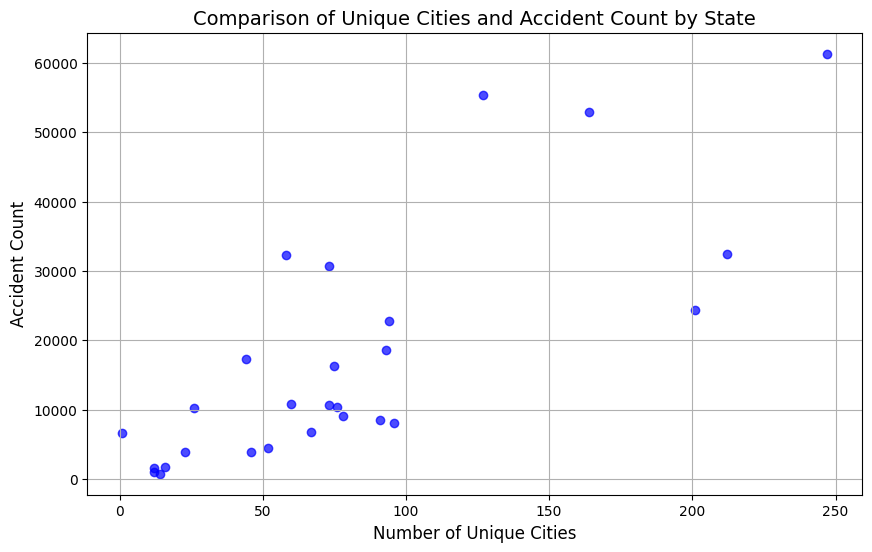

Correlation between number of unique cities and accident count: 0.78


In [150]:
# Group by state to calculate total accident count and unique cities
state_analysis = df.groupby('state').agg({
    'city': 'nunique',          # Count unique cities
    'inverse_data': 'count'     # Total accident count
}).rename(columns={'city': 'unique_cities', 'inverse_data': 'accident_count'})

# Sort by accident count for visualization
state_analysis_sorted = state_analysis.sort_values(by='accident_count', ascending=False)

# Plot a scatter plot to compare unique cities vs accident count
plt.figure(figsize=(10, 6))
plt.scatter(state_analysis['unique_cities'], state_analysis['accident_count'], color='blue', alpha=0.7)
plt.title('Comparison of Unique Cities and Accident Count by State', fontsize=14)
plt.xlabel('Number of Unique Cities', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.grid(True)
plt.show()

# Display correlation between unique cities and accident count
correlation = state_analysis['unique_cities'].corr(state_analysis['accident_count'])
print(f"Correlation between number of unique cities and accident count: {correlation:.2f}")

Regression model: Number of Unique cities vs Total accident count

Mean Squared Error: 51661502.98
R-squared : -0.02


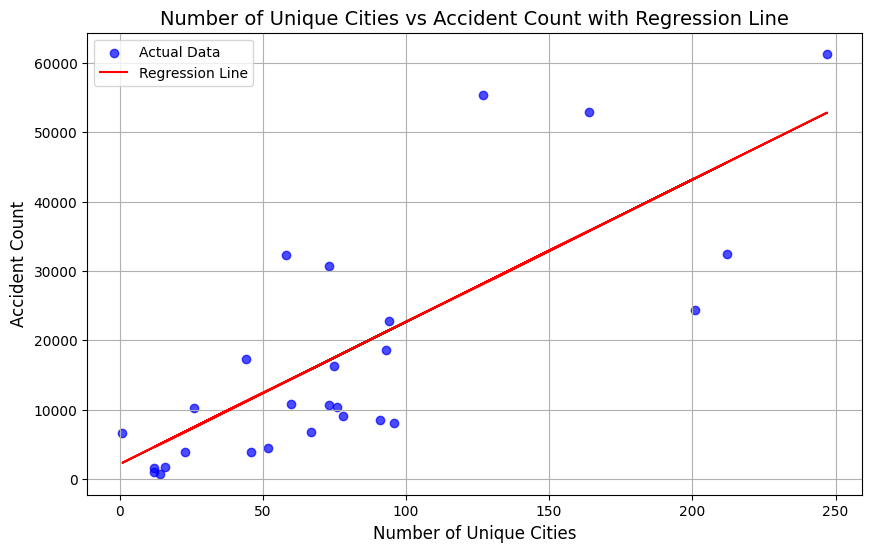

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# regression model: (unique cities vs accident count)
X = state_analysis[['unique_cities']]  # Feature
y = state_analysis['accident_count']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict accident counts on the test set
y_pred = reg_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print values for mse and r^2
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared : {r2:.2f}")

# Create Scatterplot and add the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Actual Data', color='blue')
plt.plot(X, reg_model.predict(X), color='red', label='Regression Line')  # Regression line
plt.title('Number of Unique Cities vs Accident Count with Regression Line', fontsize=14)
plt.xlabel('Number of Unique Cities', fontsize=12)
plt.ylabel('Accident Count', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Accident vs Unique cities based on: (Fatal vs non-fatal)

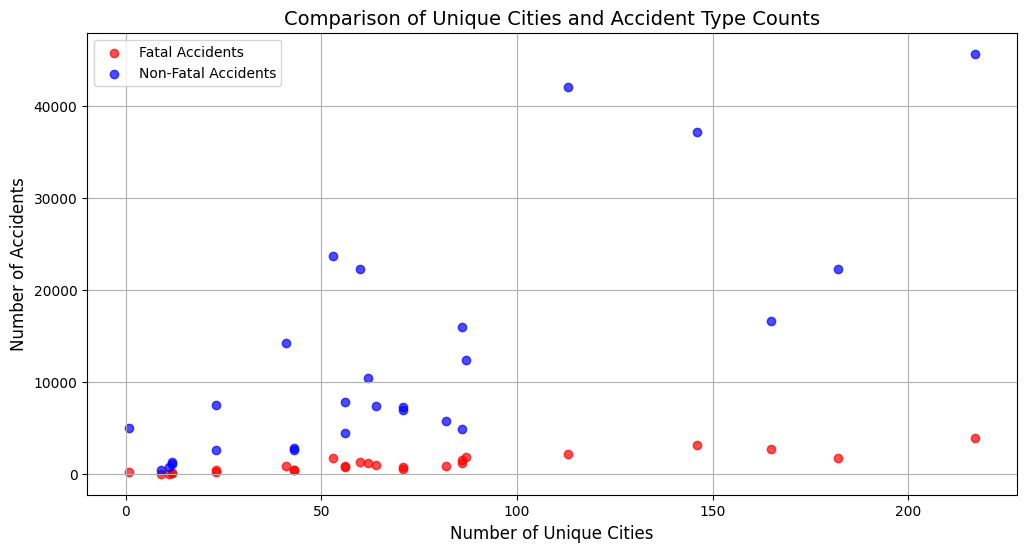

In [152]:
# Fatal accidents
fatal_accidents = df[df['victims_condition'] == 'With dead victims'].groupby('state').agg({
    'city': 'nunique',  # Unique cities
    'inverse_data': 'count'  # Total fatal accidents
}).rename(columns={'city': 'unique_cities', 'inverse_data': 'fatal_accidents'})

#non-fatal accidents
non_fatal_accidents = df[df['victims_condition'] == 'With injured victims'].groupby('state').agg({
    'city': 'nunique',  # Unique cities
    'inverse_data': 'count'  # Total non-fatal accidents
}).rename(columns={'city': 'unique_cities', 'inverse_data': 'non_fatal_accidents'})

# Combine the two datasets into one
combined_data = fatal_accidents[['unique_cities']].copy()
combined_data['fatal_accidents'] = fatal_accidents['fatal_accidents']
combined_data['non_fatal_accidents'] = non_fatal_accidents['non_fatal_accidents']

# Create scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(combined_data['unique_cities'], combined_data['fatal_accidents'], color='red', alpha=0.7, label='Fatal Accidents')
plt.scatter(combined_data['unique_cities'], combined_data['non_fatal_accidents'], color='blue', alpha=0.7, label='Non-Fatal Accidents')

# add visualization features
plt.title('Comparison of Unique Cities and Accident Type Counts', fontsize=14)
plt.xlabel('Number of Unique Cities', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Visualizations and Models based on 100,000 residents per state

We want to plot our data based on the frequency of accidents rather than total data/population

Accidents per 100,000 Residents by State (Sorted from Highest to Lowest):
       State Population  uninjured  accident_count  accidents_per_capita
state                                                                   
SC              6727148      57243           55418            823.796355
RO              1748531      12106           10243            585.806028
MT              3224357      17861           16272            504.658758
PR             11081692      56977           52933            477.661714
ES              3885049      15544           17308            445.502747
MS              2619657      11192           10862            414.634435
GO              6523222      23896           22748            348.723376
RR               496936       1706            1601            322.174284
MG             20734097      58909           61321            295.749557
RS             11207274      37644           32408            289.169338
RN              3408510       8505            9145

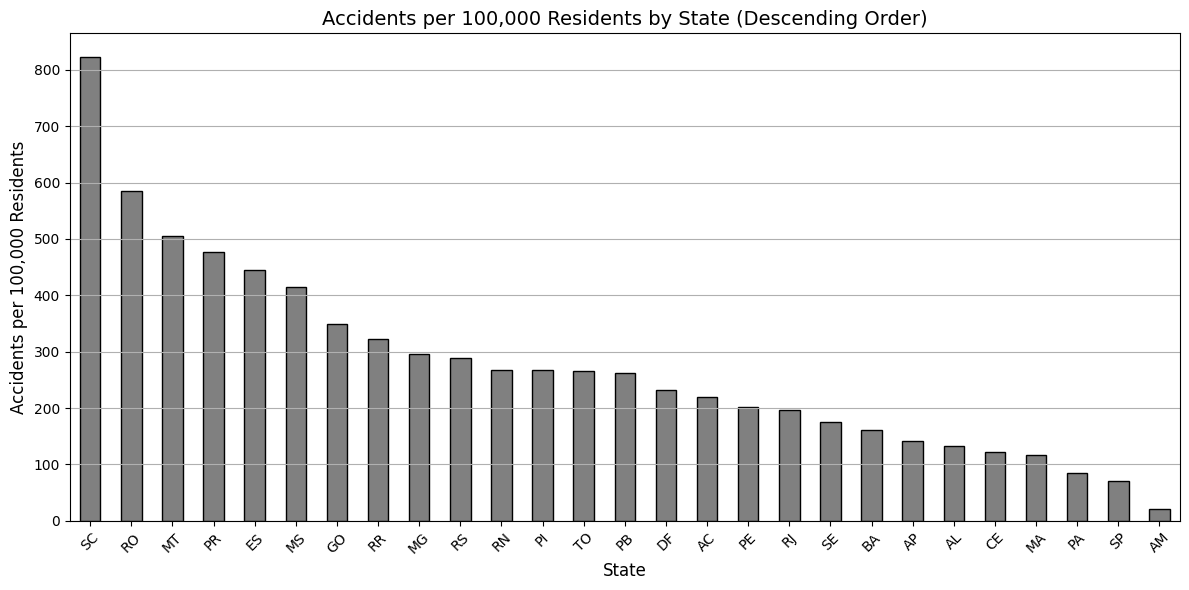

In [154]:
#create state summary: population, #uninjures, and total accidents
state_summary = df.groupby('state').agg({
    'State Population': 'first',  
    'uninjured': 'sum',          
    'inverse_data': 'count'      
}).rename(columns={'inverse_data': 'accident_count'})

# Calculate accidents per 100,000 people
state_summary['accidents_per_capita'] = (state_summary['accident_count'] / state_summary['State Population']) * 100000

# Sort state_summary by accidents per 100,000 residents in descending order
state_summary_sorted = state_summary.sort_values(by='accidents_per_capita', ascending=False)

# Print the sorted values
print("Accidents per 100,000 Residents by State (Sorted from Highest to Lowest):")
print(state_summary_sorted)

# Bar chart: Accidents per Capita (Sorted)
plt.figure(figsize=(12, 6))
state_summary_sorted['accidents_per_capita'].plot(kind='bar', color='grey', edgecolor='black')
plt.title('Accidents per 100,000 Residents by State (Descending Order)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Accidents per 100,000 Residents', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Fatal vs Non-fatal per 100k residents

Fatal and Non-Fatal Accidents per 100,000 Residents by State (Sorted from Highest to Lowest Fatal):
       fatal_per_100k  non_fatal_per_100k
state                                    
MT          39.015531          465.643227
RR          34.813336          287.360948
SC          32.376276          791.420079
TO          31.265031          234.220512
MS          30.423830          384.210605
RO          29.739250          556.066778
PR          28.380143          449.281572
PI          28.176263          238.621642
GO          24.497097          324.226280
ES          22.393540          423.109207
PE          20.048014          181.240513
MG          19.113444          276.636113
PB          19.042137          242.755557
RN          18.659180          249.639872
BA          18.431387          142.466425
MA          18.187434           99.301054
RS          15.971770          273.197568
AL          14.661035          118.612891
AC          14.301969          204.404247
SE          12.570

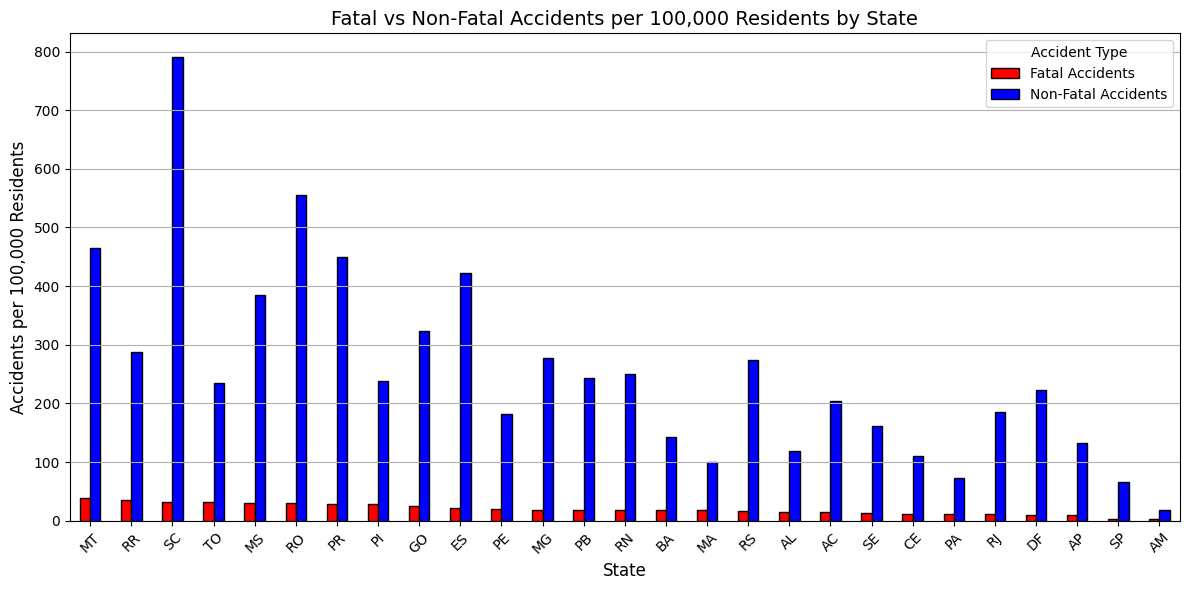

In [155]:
#create state summary based on fatal vs non fatal
state_summary = df.groupby('state').agg({
    'State Population': 'first',  # Population is the same for each state
    'victims_condition': lambda x: (x == 'With dead victims').sum(),  # Fatal accidents
    'inverse_data': 'count'  # Total accidents
}).rename(columns={
    'victims_condition': 'fatal_accidents',
    'inverse_data': 'accident_count'
})

# Calculate non-fatal accidents
state_summary['non_fatal_accidents'] = state_summary['accident_count'] - state_summary['fatal_accidents']

# Calculate fatal and non-fatal accidents per 100,000 residents
state_summary['fatal_per_100k'] = (state_summary['fatal_accidents'] / state_summary['State Population']) * 100000
state_summary['non_fatal_per_100k'] = (state_summary['non_fatal_accidents'] / state_summary['State Population']) * 100000

# Sort state_summary by fatal accidents per 100,000 residents in descending order
state_summary_sorted = state_summary.sort_values(by='fatal_per_100k', ascending=False)

# Print the sorted values
print("Fatal and Non-Fatal Accidents per 100,000 Residents by State (Sorted from Highest to Lowest Fatal):")
print(state_summary_sorted[['fatal_per_100k', 'non_fatal_per_100k']])

# Bar chart: Fatal & Non-Fatal Accidents per 100k people
state_summary_sorted[['fatal_per_100k', 'non_fatal_per_100k']].plot(
    kind='bar', figsize=(12, 6), color=['red', 'blue'], edgecolor='black'
)
plt.title('Fatal vs Non-Fatal Accidents per 100,000 Residents by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Accidents per 100,000 Residents', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(['Fatal Accidents', 'Non-Fatal Accidents'], title='Accident Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Compare side-by-side #of unique cities and the accident count per 100k

In [156]:
# Calculate accidents per 100,000 people
state_summary['accidents_per_100k'] = (state_summary['accident_count'] / state_summary['State Population']) * 100000

# Sort by accidents per 100,000 people
state_summary_sorted = state_summary.sort_values(by='accidents_per_100k', ascending=True)

# Print values
print("Accidents per 100,000 People by Unique Cities:")
print(state_summary_sorted_cities[['unique_cities', 'accidents_per_100k_by_cities']])

Accidents per 100,000 People by Unique Cities:
       unique_cities  accidents_per_100k_by_cities
state                                             
AM                14                     55.285714
MA                96                     83.843750
AL                52                     85.134615
TO                46                     86.391304
AP                12                     88.833333
PI                91                     93.648352
PA                67                    101.462687
AC                16                    108.000000
RN                78                    117.243590
BA               201                    121.084577
RR                12                    133.416667
PB                76                    135.855263
CE                73                    146.931507
RS               212                    152.867925
SE                23                    168.304348
MS                60                    181.033333
PE                93               

Combined fatal vs nonfatal accidents per 100k people

Accident Rates per 100,000 People:
       Fatal Accidents  Non-Fatal Accidents
state                                      
AM            2.245890            11.539227
SP            3.145204            50.636644
AP            9.588341           103.207833
DF            9.641099           174.872001
RJ           10.910523           144.114882
PA           11.097454            56.044620
CE           11.455659            84.339888
SE           12.570319           120.972429
AC           14.301969           169.978269
AL           14.661035            85.979294
RS           15.971770           198.522852
MA           18.187434            71.786356
BA           18.431387           110.039612
RN           18.659180           203.637366
PB           19.042137           185.502366
MG           19.113444           220.298960
PE           20.048014           134.181573
ES           22.393540           366.275947
GO           24.497097           245.614820
PI           28.176263           182.8013

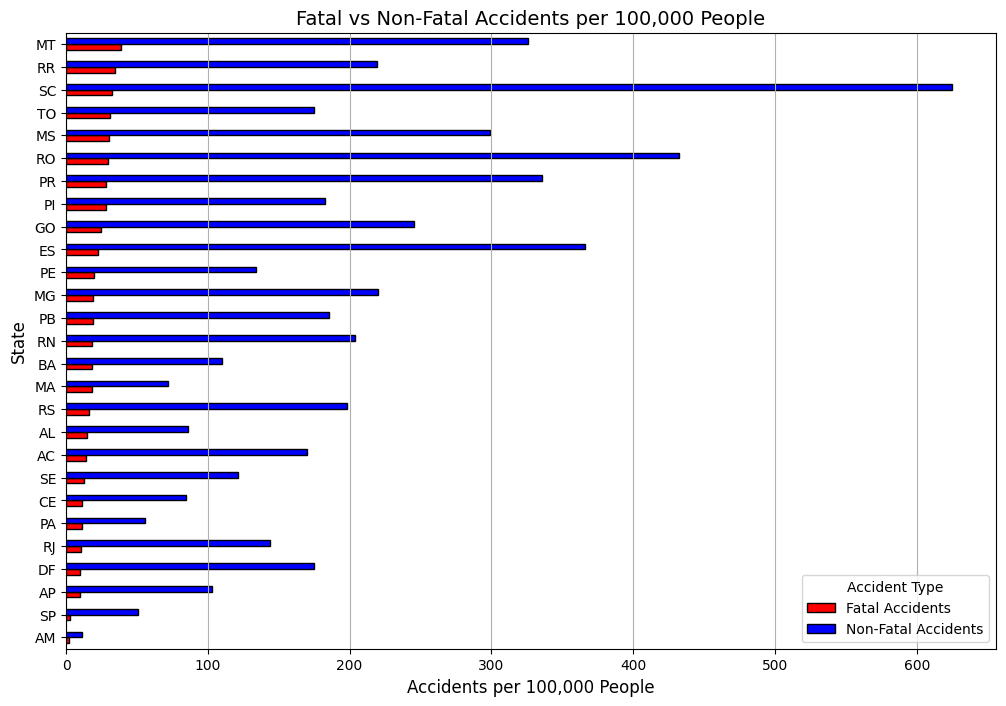

In [158]:
# Separate fatal and non-fatal accidents
fatal_accidents = df[df['victims_condition'] == 'With dead victims']
non_fatal_accidents = df[df['victims_condition'] == 'With injured victims']

# Group by state & calculate frequency
fatal_rates = fatal_accidents.groupby('state').size() / state_summary['State Population'] * 100000
non_fatal_rates = non_fatal_accidents.groupby('state').size() / state_summary['State Population'] * 100000

# Combine into one df
rates = pd.DataFrame({'Fatal Accidents': fatal_rates, 'Non-Fatal Accidents': non_fatal_rates}).sort_values(
    by='Fatal Accidents', ascending=True
)

# Print the values 
print("Accident Rates per 100,000 People:")
print(rates)

# visualize our bar chart
rates.plot(kind='barh', figsize=(12, 8), color=['red', 'blue'], edgecolor='black')
plt.title('Fatal vs Non-Fatal Accidents per 100,000 People', fontsize=14)
plt.xlabel('Accidents per 100,000 People', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.legend(title='Accident Type')
plt.grid(axis='x')
plt.show()

Linear regression Model: Predict frequency of accidents based on state population

Model 1 - Accidents per 100k vs State Population:
Mean Squared Error: 15678.35
R-squared: -0.07


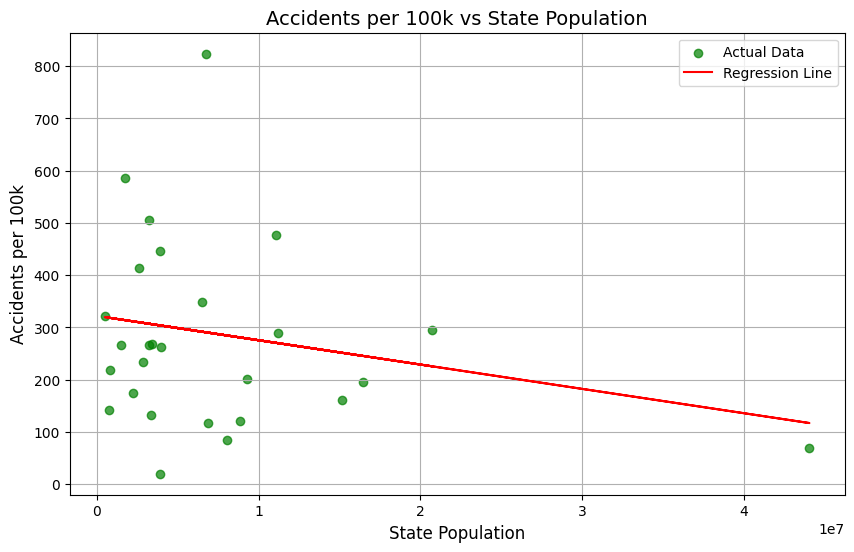

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for model
X1 = state_summary[['State Population']]  # Feature: State Population
y1 = (state_summary['accident_count'] / state_summary['State Population']) * 100000  # Target: accidents per 100k

# Train-test split, model training, & predict model
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

# measure & print (mse and r21)
mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)
print(f"Model 1 - Accidents per 100k vs State Population:")
print(f"Mean Squared Error: {mse1:.2f}")
print(f"R-squared: {r2_1:.2f}")

# Scatter plot with regression line1
plt.figure(figsize=(10, 6))
plt.scatter(X1, y1, alpha=0.7, color='green', label='Actual Data')
plt.plot(X1, model1.predict(X1), color='red', label='Regression Line') #regression line
plt.title('Accidents per 100k vs State Population', fontsize=14)
plt.xlabel('State Population', fontsize=12)
plt.ylabel('Accidents per 100k', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

model: Fatal vs non-fatal accidents per 100k


Model 2 - Fatal vs Non-Fatal Accidents per 100k Residents:
Mean Squared Error: 6543.31
R-squared: 0.65


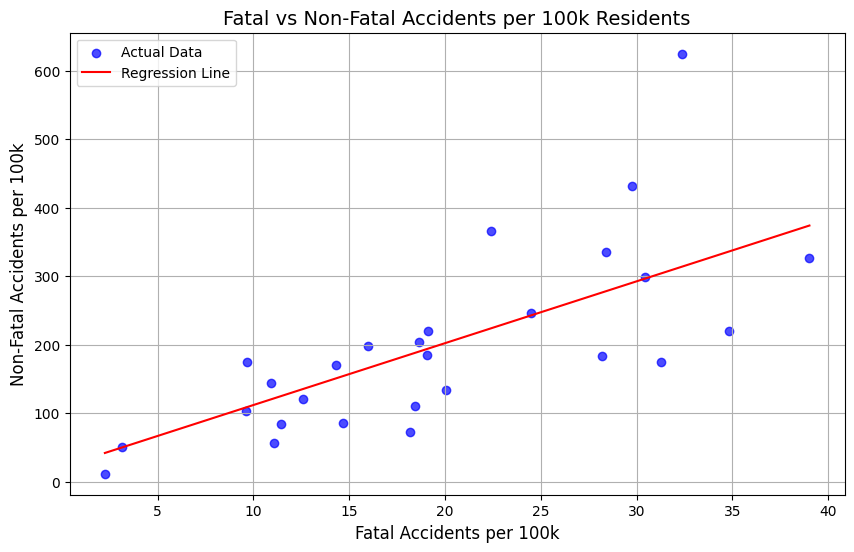

In [161]:
# Prepare data for the second predictive model: fatal vs non-fatal per 100k
X2 = rates[['Fatal Accidents']]  
y2 = rates['Non-Fatal Accidents']  

# Train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

# Evaluate model
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
#calculate & predict values:
print(f"\nModel 2 - Fatal vs Non-Fatal Accidents per 100k Residents:")
print(f"Mean Squared Error: {mse2:.2f}")
print(f"R-squared: {r2_2:.2f}")

# Scatter plot with regression line 
plt.figure(figsize=(10, 6))
plt.scatter(X2, y2, alpha=0.7, color='blue', label='Actual Data')
plt.plot(X2, model2.predict(X2), color='red', label='Regression Line')
plt.title('Fatal vs Non-Fatal Accidents per 100k Residents', fontsize=14)
plt.xlabel('Fatal Accidents per 100k', fontsize=12)
plt.ylabel('Non-Fatal Accidents per 100k', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Regression model: Accidents per 100k vs State Density

Any NaN values in target (y_density): False
Model - Accidents per 100k vs State Density:
Mean Squared Error: 86984.86
R-squared: -0.51


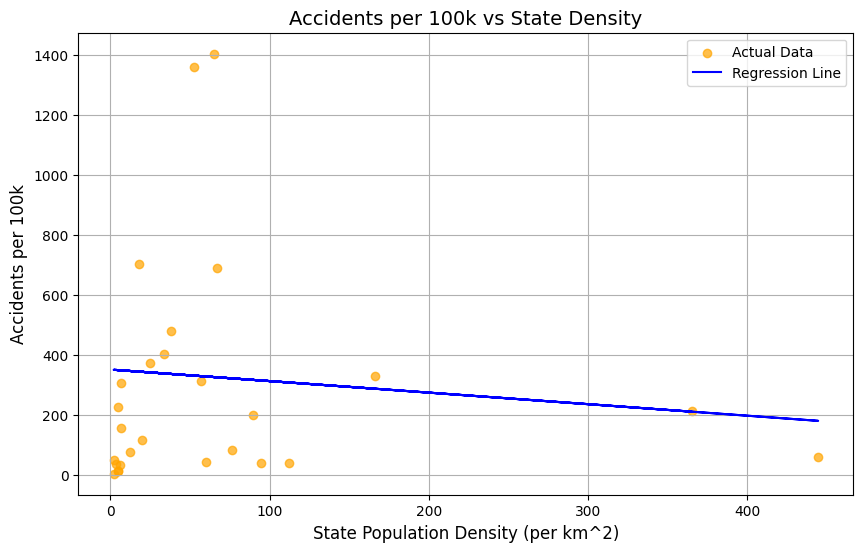

In [172]:
# Reset indices for alignment
df = df.reset_index(drop=True)
state_density_summary = state_density_summary.reset_index()
state_density_summary['State Population'] = df['State Population']

# Drop rows with missing or zero population
state_density_summary = state_density_summary[state_density_summary['State Population'] > 0]

# Calculate accidents per 100k
state_density_summary['accidents_per_100k'] = (
    state_density_summary['accident_count'] / state_density_summary['State Population']
) * 100000

#look for nan values
print("Any NaN values in target (y_density):", state_density_summary['accidents_per_100k'].isna().any())

# Extract features (State Density) and target (Accidents per 100k)
X_density = state_density_summary[['State Density']]  # Feature: State Density
y_density = state_density_summary['accidents_per_100k']  # Target: Accidents per 100k

# Train-test split
X_train_density, X_test_density, y_train_density, y_test_density = train_test_split(
    X_density, y_density, test_size=0.2, random_state=42
)
# Train the model, predict, and evaluate
model_density = LinearRegression()
model_density.fit(X_train_density, y_train_density)
y_pred_density = model_density.predict(X_test_density)
mse_density = mean_squared_error(y_test_density, y_pred_density)
r2_density = r2_score(y_test_density, y_pred_density)

# Print evaluation metrics
print(f"Model - Accidents per 100k vs State Density:")
print(f"Mean Squared Error: {mse_density:.2f}")
print(f"R-squared: {r2_density:.2f}")

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_density, y_density, alpha=0.7, color='orange', label='Actual Data')
plt.plot(X_density, model_density.predict(X_density), color='blue', label='Regression Line')  # Regression line
plt.title('Accidents per 100k vs State Density', fontsize=14)
plt.xlabel('State Population Density (per km^2)', fontsize=12)
plt.ylabel('Accidents per 100k', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()